# Titanic Case

### import libraries

install pip is pre-requisite (if never install it).

put below code into bash or code block.

`pip install pandas numpy matplotlib seaborn`


- pandas: โครงหลักสำหรับตารางข้อมูล (DataFrame)

- numpy: พื้นฐานตัวเลข/อาร์เรย์ เร็วและใช้ร่วมกับ pandas

- matplotlib: วาดกราฟพื้นฐาน

- seaborn: ชุดข้อมูลตัวอย่าง + กราฟสวยขึ้นเล็กน้อย (วันนี้ใช้แค่โหลด Titanic ได้)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### เซ็ตให้ pandas โชว์ row (width) & column เยอะขึ้น

In [6]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

### download dataset

ด้านล่างนี้ดาวน์โหลดได้เลย เป็น dataset จาก seaborn โดยตรง

In [7]:
df = sns.load_dataset("titanic")

# Data Understanding
สำรวจข้อมูลภาพรวมไวไวก่อน

#### ดูตัวอย่างข้อมูล ใช้ `head()`

In [8]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


#### ขนาดของข้อมูล ชนิดของข้อมูล และข้อมูล null

In [9]:
df.shape # จำนวน row & column
df.dtypes # data type ของแต่ละคอลัม

print("data info")
df.info() # สรุปชนิดและจำนวนของข้อมูล
print("___________")

print("total null data each column")
df.isna().sum() # นับจำนวน NaN ในแต่ละคอลัมน์

data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
___________
total null data each column


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### data stat
สรุปข้อมูลทางสถิติทั่วไป

In [10]:
df.describe() # ดูข้อมูลตัวเลข

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.describe(include='object') # ดูข้อมูลที่ไม่ใช่ตัวเลข พวก object, cat

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [12]:
# df['pclass' if 'pclass' in df.columns else 'Pclass'].value_counts()
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### Column Selection
เลือกคอลัมที่จะใช้

In [13]:
# เลือกคอลัมเดียว (Series) 

# age_col = df['age'] if 'age' in df.columns else df['Age']
age_col = df['age']

# พยายามใช้ [] กับชื่อคอลัมน์ เพื่อความชัดเจน อย่าใช้ df.age

age_col

# print(age_col)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [19]:
# เลือกหลาย ๆ คอลัม เป็น DataFrame

cols = ['pclass', 'age']
df_subset = df[cols]

# df_subset = df['pclass', 'age']



df_subset

,pclass,age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


#### Row Filtering
เอาเฉพาะคนที่อายุมากกว่า 30 และอยู่ first class

In [15]:
df_over30_p1 = df_subset[(df_subset['age'] > 30) & (df_subset['pclass'] == 1)]

df_over30_p1

,pclass,age
1,1,38.0
3,1,35.0
6,1,54.0
11,1,58.0
30,1,40.0
...,...,...
862,1,48.0
867,1,31.0
871,1,47.0
872,1,33.0


#### Sorting

In [16]:
df_sorted = df_subset.sort_values(['pclass', 'age'], ascending=[True, False])

df_sorted

,pclass,age
630,1,80.0
96,1,71.0
493,1,71.0
745,1,70.0
54,1,65.0
...,...,...
859,3,NaN
863,3,NaN
868,3,NaN
878,3,NaN


#### Group By 

จะหา่าเฉลี่ยของอายุ ต่อชั้น
ต้องเคลียร์ NaN ก่อน เพราะ `.mean()` จะข้าม NaN แต่ต้องดูว่าจะลบ NaN หรือเติมค่าแทน (impute)

##### ข้าม NaN แล้วเฉลี่ย

In [ ]:
mean_age_by_pclass = (
    df_subset.groupby('pclass')['age'] # groupby('Category')['Value']
        .mean() # skipna = True as normal
        .reset_index(name='mean_age')
        .sort_values('pclass')
)

mean_age_by_pclass

,pclass,mean_age
0,1,38.233441
1,2,29.877630
2,3,25.140620


##### สรุปค่าทางสถิติ mean, median, count, missing

In [ ]:
summary_by_pclass = (
    df_subset.groupby('pclass')['age']
        .agg(mean_age = 'mean', median_age = 'median', n = 'count')
        .reset_index()
        .sort_values('pclass')
)

summary_by_pclass['missing_age'] = (
    df_subset['age'].isna().groupby(df_subset['pclass']).sum().values #.values เพื่อให้ลบ index เอามาเป็น array แล้วไปแปะกับของเดิมเลย ถ้าไม่มีจะผิด
)

summary_by_pclass

,pclass,mean_age,median_age,n,missing_age
0,1,38.233441,37.0,186,30
1,2,29.877630,29.0,173,11
2,3,25.140620,24.0,355,136


##### เติมค่าอายุที่หายไป ด้วยค่าเฉลี่ยตามชั้น (impute) -- แล้วค่อยเอามาเฉลี่ยอีกที

In [33]:
# cal mean for each pclass

class_means = df_subset.groupby('pclass')['age'].transform('mean')

df_imputed = df_subset.copy()
df_imputed['age'] = df_imputed['age'].fillna(class_means)



mean_age_by_pclass_imputed = (
    df_imputed.groupby('pclass')['age']
        .mean()
        .reset_index(name='mean_age_imputed')
        .sort_values('pclass')
)
mean_age_by_pclass_imputed
# df_imputed.isna().sum()

,pclass,mean_age_imputed
0,1,38.233441
1,2,29.877630
2,3,25.140620


#### Visualization
bar chart ของค่าเฉลี่ยอายุ

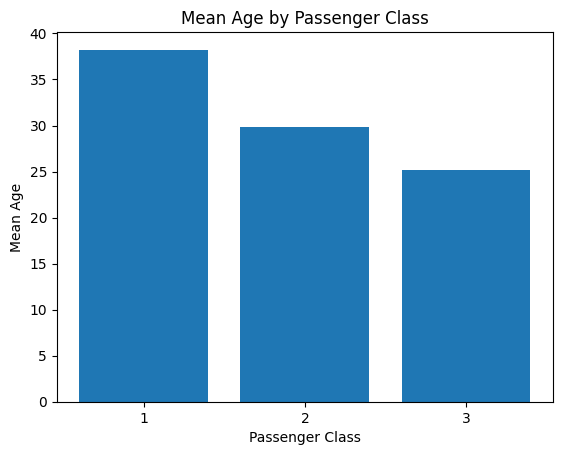

In [ ]:
result = mean_age_by_pclass

plt.figure(facecolor='none') # สร้าง canvas ใหม่ ถ้าครั้งแรกไม่มีไม่เป็นไร แต่ถ้ามีการทำ chart เพิ่มแล้วไม่ figure() มันจะซ้อนกัน
plt.bar(result['pclass'].astype(str), result['mean_age'])
plt.title('Mean Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Age')

plt.show()

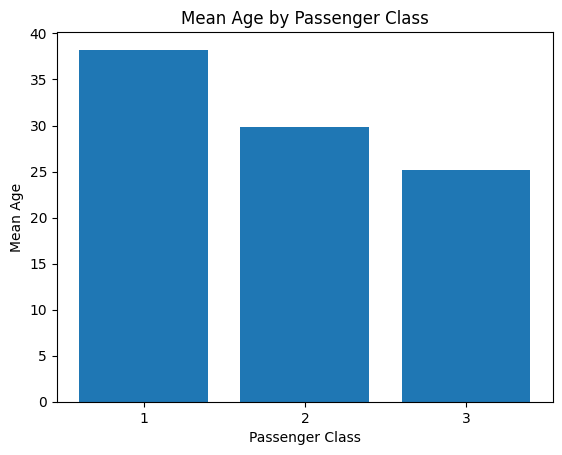

In [40]:
#ทำพื้นหลังใส

result = mean_age_by_pclass

fig = plt.figure(facecolor='none')
ax = fig.add_subplot(111, facecolor='none')


ax.bar(result['pclass'].astype(str), result['mean_age'])
ax.set_title('Mean Age by Passenger Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Mean Age')

plt.show()